<h1><center> About the MNIST dataset</center></h1>

![](https://cdn-images-1.medium.com/max/1600/1*1TkgO9Zz6rC3KpAYNl5KfA.png)

<h1>What is the MNIST dataset?</h1>

The MNIST dataset(<b>M</b>odified <b>N</b>ational <b>I</b>nstitute of <b>S</b>tandards and <b>T</b>echnology database)is a large dataset containing images of handwritten digits, similar to the ones above. It's most commonly used for trainning image processing systems and algorithims. It's based on the <i>NIST</i> dataset and was edited to just be better in general. Some of these changes include the people who wrote the digits as well as normalizing a lot of the digits. The website for the dataset can be found [here](http://yann.lecun.com/exdb/mnist/).

# Details
* 60,000 training images and 10,000 testing images.
* Digits written by high school students and employees of the United States Census Bureau.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

<h1> 1. Unzip the files</h1>


The pictures of the numbers are stored as .idx files in a zipped folder. As such, we are going to have to figure out how to handle these files. We need to unzip the folders to get at the data inside as well as figuring out how we are going to read the numbers in a meaningful way. Let's start by unzipping the folders.

<b>WARNING</b>
The files required for this notebook are not included. You should create a folder called 'data' and drop the zip files from [here](http://yann.lecun.com/exdb/mnist/) into it.
<b>WARNING</b>

The following files are compressed using gzip. Fortunately, Python has a library to help us deal with these gzip files.

In [1]:
# Import gzip to unzip our files
import gzip

# Using gzip we just import, open the zip files contained in our data folder
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as file:
    file_content = file.read()  

# Print the first 4 elements of our file to make sure we're opening it properly
file_content[0:4]

b'\x00\x00\x08\x03'

<h1> 2. Read the IDX files</h1>


Now, to read the IDX files contained in the zipped folders, we can use a package 'idx2numpy' which will convert our idx files into a numpy array.

In [2]:
# Import numpy as np
import numpy as np

# Import cv2 to save the image
import cv2

# Take an image from the .idx file found inside the zip file and reshapre into a
# 28x28 numpy array as unsigned 8 bit integer
image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

Now let's show the image we just took from the .idx file so we can check to see if we are reading in the information properly. We can do this using matplotlib

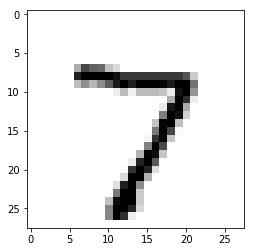

In [3]:
%matplotlib inline

# Import matplotlib so we can plot the image
import matplotlib.pyplot as plt

# Show tge image we created above
plt.imshow(image, cmap='gray')

Now that we know the image is being properly read in, we can save this image to the folder where out Python file is to also check that the files are being save properly.

In [4]:
# Import cv2 so we can use it to save the image we created above
import cv2

# Save the image with a name of 'firstImage' using cv2's imwrite function
cv2.imwrite('firstImage.png', image)

True

<h1> 3. Save the images</h1>

Now that we know how to properly handle the .idx files we need to figure out a way to read all of the images in the .idx file and not just the first one. We can do this by looping over the byes somehow..


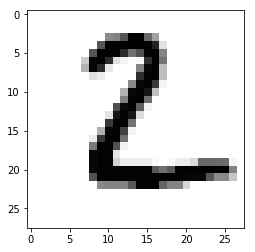

In [5]:
image = ~np.array(list(file_content[800:1584])).reshape(28,28).astype(np.uint8)
plt.imshow(image, cmap='gray')

Here we are plotting the second image. We have done this as every 784 bytes after the first 16 bytes represents an image in the file.

Now we can read in every image from the .idx file and save it with an appropriate tag/labl. We start at the 16th byte as bytes 0-16 contain information about the rest of the files. After the first 16 bytes, every 784 bytes after that represents an imaage.

In [6]:
# Variables
bytes1=16
bytes2=800

# For loop to loop through each image (784 bytes) 
for x in range(10):
    image = ~np.array(list(file_content[bytes1:bytes2])).reshape(28,28).astype(np.uint8)
    bytes1+=784
    bytes2+=784
    cv2.imwrite('train-' + str(x) + '.png', image)

We can however save these images along with their proper labels as contained in the label test set .idx file (t10k-labels-idx1-ubyte). So let's open this file and see if we can combine their contents.

In [7]:
# Import gzip to unzip our files
import gzip

# Variables
bytes1=8
bytes2=9

# Using gzip we just import, open the zip files contained in our data folder
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as file_labels:
    file_content = file_labels.read()
    

# For loop to loop through each image (784 bytes) 
for x in range(10):
    labels = np.array(list(file_content[bytes1:bytes2])).astype(np.uint8)
    bytes1+=1
    bytes2+=1
    print(labels)

[7]
[2]
[1]
[0]
[4]
[1]
[4]
[9]
[5]
[9]


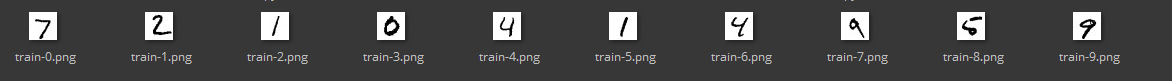

Now that we have both the labels and the images and we can see they correspond correctly, we can save the images with the corresponding number included in the title of the image.

In [8]:
# Import gzip to unzip our files
import gzip

# Import cv2 to save the images
import cv2

# Variables for Training Image Set
trainImagesBytes1=16
trainImagesBytes2=800

# Variables for Training Labels Set
trainLabelsBytes1=8
trainLabelsBytes2=9

# Using gzip we just imported, open the zip files contained in our data folder
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as file_images:
    image_contents = file_images.read()
    
# Using gzip we just imported, open the zip files contained in our data folder
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as file_labels:
    labels_contents = file_labels.read()

# Loop through the images assigning a corresponding label of the the drawn number
for x in range(10):
        image = ~np.array(list(image_contents[trainImagesBytes1:trainImagesBytes2])).reshape(28,28).astype(np.uint8)
        labels = np.array(list(labels_contents[trainLabelsBytes1:trainLabelsBytes2])).astype(np.uint8)
        
        # Each byte corresponds to a 1 label so increment by 1
        trainLabelsBytes1+=1
        trainLabelsBytes2+=1
        
        # Every 784 bytes corresponds to a 1 image so increment by 784
        trainImagesBytes1+=784
        trainImagesBytes2+=784
        
        # Save the images with the following format
        # E.G train-(0)_[7]
        # This means the image is from the training set, is the first image in the set and the drawn image is a 7
        cv2.imwrite('train-(' + str(x) + ')' + '_' + str(labels) + '.png', image)

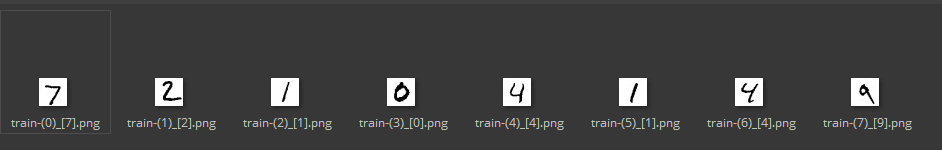

<h3> References</h3>

* [Iris data set information](https://archive.ics.uci.edu/ml/datasets/iris)

* [Iris data set information](https://archive.ics.uci.edu/ml/datasets/iris)

* [Iris data set information](https://archive.ics.uci.edu/ml/datasets/iris)

* [Iris data set information](https://archive.ics.uci.edu/ml/datasets/iris)

* [Iris data set information](https://archive.ics.uci.edu/ml/datasets/iris)

* [Iris data set information](https://archive.ics.uci.edu/ml/datasets/iris)

